In [2]:
# load data
import pandas as pd
df = pd.read_csv("./traindata1.1.csv",engine="python")
df.drop(axis=1, inplace=True, columns=['UserID','Date/Time'] )
df.drop_duplicates(inplace=True)
# feature column and target
# ENGoogleTranslate | finalLabel5Classes
_target_col = 'finalLabel3Classes'
_feature_col = 'ENGoogleTranslate'
df[[_feature_col,_target_col]]

# df[_target_col].unique()

,ENGoogleTranslate,finalLabel3Classes
0,'g oh mammal feel sorry for the kids wod out w...,NEG
1,'my message is a response to your demand that ...,NEU
2,'you are making fun of people who are single y...,NEG
3,'g is how to do',NEU
4,'g am honest and prectical quetical quems perm...,POS
...,...,...
12761,"""g adam and eve are original to do something w...",POS
12762,'g gt gextly as they ate them paid us when the...,NEG
12763,'g ismagine a man weird on shadaa because ah l...,NEG
12764,'g iskyra and tend to do so in privacy',NEU


In [73]:
# # text processing function 

import re
import string
def clean_text(text):
    # to lower case
    text = str(text)
    text = text.lower()
    # remove links
    text = re.sub('https:\/\/\S+', '', text) 
    # remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    # remove next line     
    text = re.sub(r'[^ \w\.]', '', text) 
    # remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)

    text = ' '.join( text.split() )
    return text# Create a new column called "Text" for collecting clean text

def clean( text ):
  '''clean tweet texts and remove links, usernamas'''
  text = text.lower()
  text = ' '.join( text.split() )
  text = ' '.join( [ re.sub("^@\w+", " ", t) for t in text.split(' ') ] ) # remove usernames
  # text = ' '.join( [ re.sub("^@\w+", " ", t) for t in text.split(' ') ] ) # remove hashtags
  text = ' '.join( [ re.sub("^http\w+", " ", t) for t in text.split(' ') ] ) # remove links
  text = ' '.join( text.split() )
  text = ' '.join( [t for t in text.split(' ') if not len(t)==1 and not t=='g' ] ) # remove g
  return ' '.join( text.split() )

df['Text'] = df[_feature_col].apply(lambda x: clean_text(x))
df['Text'] = df['Text'].apply(lambda x: clean_text(x))
df[['Text', _target_col]]

,Text,finalLabel3Classes
0,g oh mammal feel sorry for the kids wod out while,NEG
1,my message is a response to your demand that w...,NEU
2,you are making fun of people who are single yo...,NEG
3,g is how to do,NEU
4,g am honest and prectical quetical quems perm ...,POS
...,...,...
12761,g adam and eve are original to do something wr...,POS
12762,g gt gextly as they ate them paid us when the ...,NEG
12763,g ismagine a man weird on shadaa because ah le...,NEG
12764,g iskyra and tend to do so in privacy,NEU


<AxesSubplot: xlabel='finalLabel3Classes', ylabel='count'>

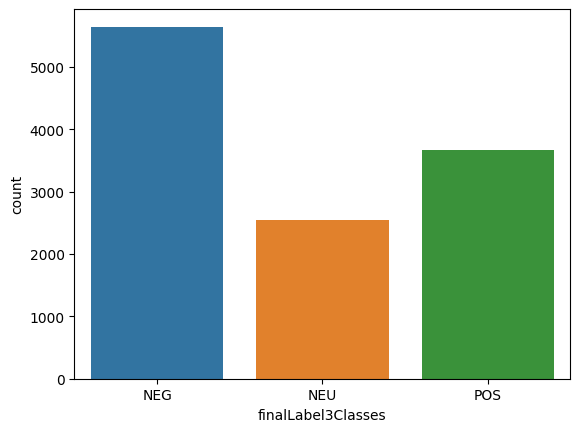

In [74]:
# plot data to see, distributions.
import seaborn as sns

sns.countplot(data=df, x=_target_col)

In [78]:
classes = df[_target_col].unique()
samples = {'neg':[], 'pos':[], 'neu': []}
classes

# df[['Text', _target_col]].values
# df[ _target_col ] == 'NEG'
for sample in df[['Text', _target_col]].values:
    if sample[1] and sample[1].lower() == 'neu':
        samples['neu'].append(sample[0])
    elif sample[1] and sample[1].lower() == 'pos':
        samples['pos'].append(sample[0])
    elif sample[1] and sample[1].lower() == 'neg':
        samples['neg'].append(sample[0])
        

min_sample_class = min( [ len(v) for v in samples.values() ] ) # 2540
min_sample_class


2540

In [79]:
import pandas as pd
from sklearn.utils import shuffle
df1 = pd.DataFrame( { 'Text': samples['neu'][: min_sample_class], "target": ['neu']*min_sample_class } ) 
df2 = pd.DataFrame( { 'Text': samples['pos'][: min_sample_class], "target": ['pos']*min_sample_class } ) 
df3 = pd.DataFrame( { 'Text': samples['neg'][: min_sample_class], "target": ['neg']*min_sample_class } ) 
data = pd.concat([df1, df3, df2], ignore_index=True)
# data = data.sample(frac=1).reset_index(drop=True)
data = shuffle(data)
data.reset_index( inplace=True, drop=True)
data

,Text,target
0,g i wasz online me enlighten me soome more i w...,pos
1,g hear this the last,neg
2,g judg on social media as induma uva zimbabweg...,pos
3,g or king shadaya talking touct voices for tom...,pos
4,g t in most cases you will and the community o...,neg
...,...,...
7615,g what you win do youre going to fight for the...,neg
7616,g off these children,neu
7617,no cover up praase bind people please down by ...,neg
7618,g no mashop closed people came alone uninto yo...,neg


<AxesSubplot: xlabel='target', ylabel='count'>

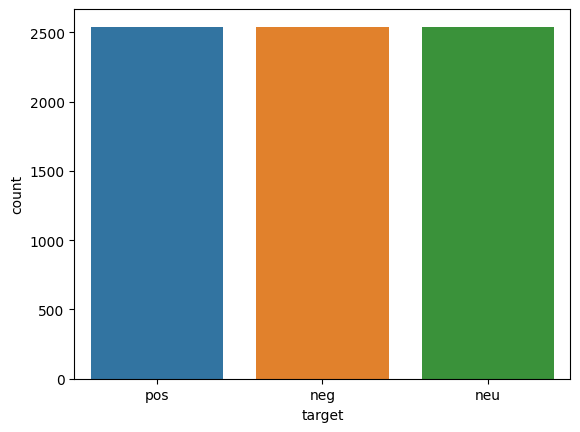

In [80]:
sns.countplot(data=data, x='target')

In [68]:
# write dataframe to file.
filename = f"./data/clean_text_cl3.csv"
data.to_csv(filename, index=False )